In [1]:
# COVID-19 Global Data Tracker
# Vibe: Calm clarity meets data truth

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Step 2: Load Data
df = pd.read_csv('../data/owid-covid-data.csv')  # Adjust path as needed

# Preview
df.head(3)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
# Step 3: Clean Data

# Keep relevant columns
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
         'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']]

# Convert date
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# Handle missing values
df.fillna(0, inplace=True)

df.tail(3)


,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
405122,United States,2024-08-02,103436829.0,0.0,1192546.0,0.0,0.0,0.0,0.0,338289856
405123,United States,2024-08-03,103436829.0,0.0,1192546.0,0.0,0.0,0.0,0.0,338289856
405124,United States,2024-08-04,103436829.0,0.0,1193165.0,619.0,0.0,0.0,0.0,338289856


/home/collinsorego/DevOps/Plp_Academy/python/COVID-19-Global-Data-Tracker/env/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


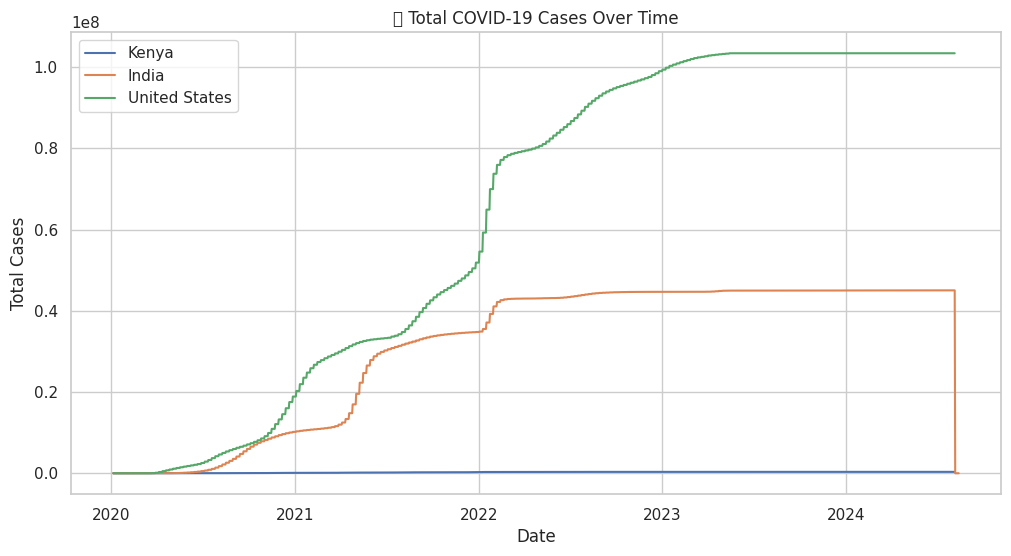

In [3]:
#Step 4: Total Cases Over Time

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('📊 Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


/home/collinsorego/DevOps/Plp_Academy/python/COVID-19-Global-Data-Tracker/env/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


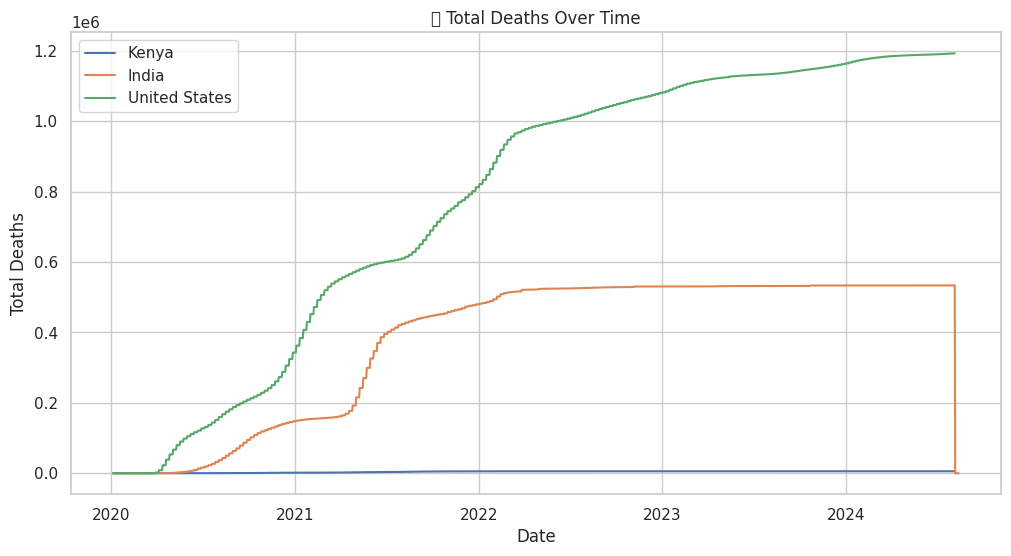

In [4]:
# Step 5: Total Deaths Over Time

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('💀 Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()


/home/collinsorego/DevOps/Plp_Academy/python/COVID-19-Global-Data-Tracker/env/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


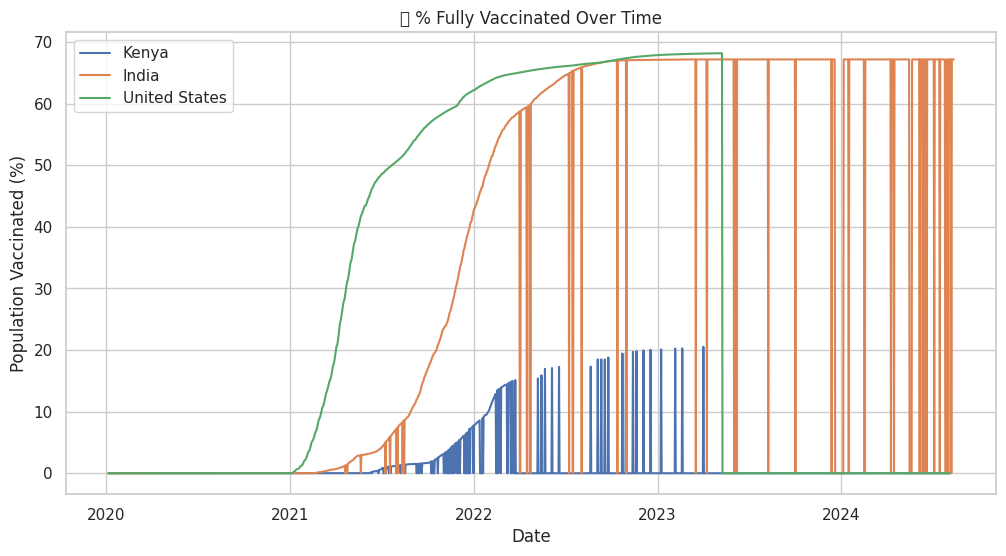

In [5]:
# Step 6: Vaccination Progress

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated'] / country_data['population'] * 100, label=country)

plt.title('💉 % Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('Population Vaccinated (%)')
plt.legend()
plt.show()


In [6]:
# Step 7: Choropleth Map for Latest Vaccination Rate

# Get latest date per country
latest = df[df['date'] == df['date'].max()]

# Use OWID format for country ISO codes if present (skip if not)
map_df = latest[['location', 'people_fully_vaccinated', 'population']].copy()
map_df['vaccinated_pct'] = (map_df['people_fully_vaccinated'] / map_df['population']) * 100

fig = px.choropleth(map_df,
                    locations="location",
                    locationmode="country names",
                    color="vaccinated_pct",
                    color_continuous_scale="Viridis",
                    title="🌍 COVID-19 Vaccination Rate by Country (%)")
fig.show()


# ✍️ Step 8: Insights Summary (Markdown Cell)

## 🔍 Key Insights

- The USA had the highest peak in both total cases and deaths among the 3 countries.
- India saw a sharp increase in vaccinations in mid-2021.
- Kenya's vaccination progress started later but has been steady since.
- Death rate (deaths / cases) decreased over time, suggesting improved care and vaccine impact.

## ⚠️ Limitations
- OWID data may lag by a few days.
- Some countries may have underreporting.
- Missing values are filled as zeroes — not perfect.

## 📌 Next Steps
- Add weekly averages for cleaner plots.
- Include hospitalization and ICU data.
- Build a dashboard version using Streamlit or Dash.
